In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [13]:
aux = pd.read_csv("../datasets_models/mean_temp_x_day.csv")
aux["data_lectura"] = 
df = pd.Series(aux.valor_lectura.values, index=aux.data_lectura.values)

In [10]:
aux

,comarca,codi_variable,data_lectura,valor_lectura
0,Vallès Oriental,32,2009-01-01,8.059722
1,Vallès Oriental,32,2009-01-02,7.416667
2,Vallès Oriental,32,2009-01-03,5.665278
3,Vallès Oriental,32,2009-01-04,4.345833
4,Vallès Oriental,32,2009-01-05,3.138824
...,...,...,...,...
37095,Vallès Occidental,32,2023-07-05,21.832143
37096,Vallès Occidental,32,2023-07-06,22.760119
37097,Vallès Occidental,32,2023-07-07,23.723214
37098,Vallès Occidental,32,2023-07-08,25.869048


In [14]:
df

2009-01-01     8.059722
2009-01-02     7.416667
2009-01-03     5.665278
2009-01-04     4.345833
2009-01-05     3.138824
                ...    
2023-07-05    21.832143
2023-07-06    22.760119
2023-07-07    23.723214
2023-07-08    25.869048
2023-07-09    25.338776
Length: 37100, dtype: float64

In [15]:
result = adfuller(df)
print('Resultado del test de Dickey-Fuller:')
print('Valor p:', result[1])
print('Estacionaria:', result[1] < 0.05)

Resultado del test de Dickey-Fuller:
Valor p: 2.3849470256426087e-30
Estacionaria: True


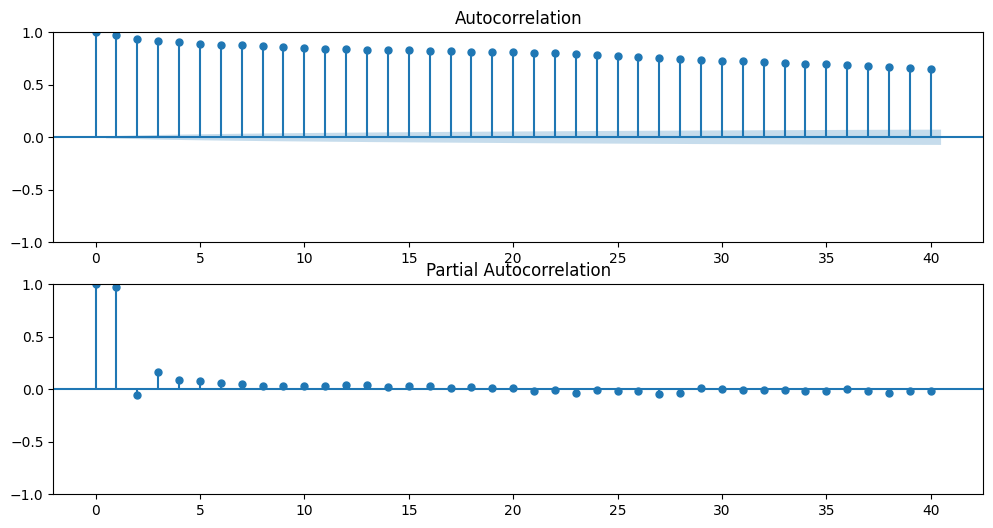

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df, ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(df, ax=plt.gca(), lags=40)
plt.show()

In [19]:
# Ajuste del modelo ARIMA con los órdenes identificados (p, d, q)
# Ejemplo: p=1, d=1, q=1
model = ARIMA(df, order=(1, 1, 1))
results = model.fit()

# Realizar predicciones para los próximos 365 días (1 año)
forecast_steps = 15
forecast, stderr, conf_int = results.forecast(steps=forecast_steps)

# Crear índice de fechas para las predicciones
forecast_dates = pd.date_range(start='2023-09-08', periods=forecast_steps, freq='D')

# Crear una serie de tiempo con las predicciones
forecast_series = pd.Series(forecast, index=forecast_dates)

c:\Users\jairo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jairo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jairo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jairo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

ValueError: too many values to unpack (expected 3)